# Feature Engineering and Feature Selection

In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [23]:
# Import the required libraries

import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
%matplotlib inline

from src.load_data.load_data import load_train_data, load_test_data
from src.data_preprocessing.feat_eng import MissingValueImputer, RareCatLabelsHandler, CatFeatEncoder, feat_eng_pipeline1, save_feat_eng_df
from src.data_preprocessing.remove_correlated_features import CorrelatedFeaturesRemover
from src.data_preprocessing.rfe import FeatureSelector
#from src.data_preprocessing.feat_selection import FeatureSelector

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

# To visualise all the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

## Load the Data

In [3]:
train_df = load_train_data('../Data')
test_df = load_test_data('../Data')

2022-12-07 06:45:22,477 | INFO : LOADING THE TRAIN DATA
TRAIN DF SHAPE: (1460, 81)
2022-12-07 06:45:22,504 | INFO : LOADING THE TEST DATA
TEST DF SHAPE: (1459, 80)


## Split the Training Dataset into Train and Validation Sets

In [4]:
train_df, valid_df = train_test_split(train_df, test_size=0.2, random_state=42)

### Data Sample

In [7]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
254,255,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1957,1957,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,Gd,CBlock,TA,TA,No,Rec,922,Unf,0,392,1314,GasA,TA,Y,SBrkr,1314,0,0,1314,1,0,1,0,3,1,TA,5,Typ,0,NaN,Attchd,1957.0,RFn,1,294,TA,TA,Y,250,0,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal,145000
1066,1067,60,RL,59.0,7837,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,7,1993,1994,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,799,799,GasA,Gd,Y,SBrkr,799,772,0,1571,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1993.0,RFn,2,380,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,5,2009,WD,Normal,178000
638,639,30,RL,67.0,8777,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Feedr,Norm,1Fam,1Story,5,7,1910,1950,Gable,CompShg,MetalSd,Wd Sdng,None,0.0,TA,TA,CBlock,Fa,TA,No,Unf,0,Unf,0,796,796,GasA,Gd,Y,FuseA,796,0,0,796,0,0,1,0,2,1,TA,4,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,P,328,0,164,0,0,0,NaN,MnPrv,NaN,0,5,2008,WD,Normal,85000
799,800,50,RL,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Feedr,Norm,1Fam,1.5Fin,5,7,1937,1950,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,252.0,TA,TA,BrkTil,Gd,TA,No,ALQ,569,Unf,0,162,731,GasA,Ex,Y,SBrkr,981,787,0,1768,1,0,1,1,3,1,Gd,7,Typ,2,TA,Detchd,1939.0,Unf,1,240,TA,TA,Y,0,0,264,0,0,0,NaN,MnPrv,NaN,0,6,2007,WD,Normal,175000
380,381,50,RL,50.0,5000,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,SWISU,Norm,Norm,1Fam,1.5Fin,5,6,1924,1950,Gable,CompShg,BrkFace,Wd Sdng,None,0.0,TA,TA,BrkTil,TA,TA,No,LwQ,218,Unf,0,808,1026,GasA,TA,Y,SBrkr,1026,665,0,1691,0,0,2,0,3,1,Gd,6,Typ,1,Gd,Detchd,1924.0,Unf,1,308,TA,TA,Y,0,0,242,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,127000


In [8]:
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


## Create Train, Valid and Test Datasets

We drop the Id column from both train and test sets as they are just increasing numbers without any useful information.

(No need to create validation dataset as we will do hyperparameter tuning using cross-validation)

In [5]:
X_train = train_df.drop(['Id', 'SalePrice'], axis=1)
y_train = train_df['SalePrice']

X_valid = valid_df.drop(['Id', 'SalePrice'], axis=1)
y_valid = valid_df['SalePrice']

X_test = test_df.drop('Id', axis=1)

In [6]:
print(X_train.shape, X_test.shape)

(1168, 79) (1459, 79)


We will perform the following steps:
1. Ensure Proper Data Types
2. Handle Missing Values
3. Temporal Variables
4. Cosine Transformation for Cyclic Features
5. Log Transformation for Numerical Features (NOT NEEDED FOR TREE-BASED ALGORITHMS)
6. Categorical Variables: Remove Rare Labels
7. Encoding Categorical Variables
8. Standardise Values of Variables to the Same Range (NOT NEEDED FOR TREE-BASED ALGORITHMS)
9. Log Transform the Target (NOT NEEDED FOR TREE-BASED ALGORITHMS)

## Feature Engineering and Feature Selection Pipeline

### Feature Engineering Pipeline1

In [7]:
X_train_eng = feat_eng_pipeline1(X_train)

src.data_preprocessing.feat_eng-INFO-CONVERTING DTYPE OF MSSubClass COLUMN TO STRING...


2022-12-07 06:45:31,745 | INFO : CONVERTING DTYPE OF MSSubClass COLUMN TO STRING...


src.data_preprocessing.feat_eng-INFO-CREATING NEW FEATURES BY SUBTRACTNG TEMPORAL VARIABLES FROM YrSold COLUMN...


2022-12-07 06:45:31,748 | INFO : CREATING NEW FEATURES BY SUBTRACTNG TEMPORAL VARIABLES FROM YrSold COLUMN...


src.data_preprocessing.feat_eng-INFO-COSINE TRANSFORMING THE MoSold COLUMN...


2022-12-07 06:45:31,752 | INFO : COSINE TRANSFORMING THE MoSold COLUMN...


In [8]:
X_valid_eng = feat_eng_pipeline1(X_valid)

src.data_preprocessing.feat_eng-INFO-CONVERTING DTYPE OF MSSubClass COLUMN TO STRING...


2022-12-07 06:45:32,904 | INFO : CONVERTING DTYPE OF MSSubClass COLUMN TO STRING...


src.data_preprocessing.feat_eng-INFO-CREATING NEW FEATURES BY SUBTRACTNG TEMPORAL VARIABLES FROM YrSold COLUMN...


2022-12-07 06:45:32,908 | INFO : CREATING NEW FEATURES BY SUBTRACTNG TEMPORAL VARIABLES FROM YrSold COLUMN...


src.data_preprocessing.feat_eng-INFO-COSINE TRANSFORMING THE MoSold COLUMN...


2022-12-07 06:45:32,912 | INFO : COSINE TRANSFORMING THE MoSold COLUMN...


In [9]:
X_test_eng = feat_eng_pipeline1(X_test)

src.data_preprocessing.feat_eng-INFO-CONVERTING DTYPE OF MSSubClass COLUMN TO STRING...


2022-12-07 06:45:34,132 | INFO : CONVERTING DTYPE OF MSSubClass COLUMN TO STRING...


src.data_preprocessing.feat_eng-INFO-CREATING NEW FEATURES BY SUBTRACTNG TEMPORAL VARIABLES FROM YrSold COLUMN...


2022-12-07 06:45:34,135 | INFO : CREATING NEW FEATURES BY SUBTRACTNG TEMPORAL VARIABLES FROM YrSold COLUMN...


src.data_preprocessing.feat_eng-INFO-COSINE TRANSFORMING THE MoSold COLUMN...


2022-12-07 06:45:34,141 | INFO : COSINE TRANSFORMING THE MoSold COLUMN...


### Define Numerical and Categorical Features

In [10]:
# For numerical columns, we pass all of them (not just the ones with missing valuees)
# As IterativeImputer models each feature with missing values as a function of all other features
numeric_features = list(X_train_eng.select_dtypes(np.number).columns)

# For some columns, NaN values, instead of indicating the absence of data, have an actual meaning such as No Alley
# Therefore, we will replace such NaN values by None
# We go through each categorical col. with missing values one by one to identify the ones where NaN values mean something
cat_features1 = ['Alley',
                 'BsmtQual',
                 'BsmtCond',
                 'BsmtExposure',
                 'BsmtFinType1',
                 'BsmtFinType2',
                 'FireplaceQu',
                 'GarageType',
                 'GarageFinish',
                 'GarageQual',
                 'GarageCond',
                 'PoolQC',
                 'Fence',
                 'MiscFeature'
                ]

# For categorical variables where NaN values just indicate the absence of data, we will replace with the Mode of the column
cat_features2 = ['MSZoning',
                'Utilities',
                'Exterior1st',
                'Exterior2nd',
                'MasVnrType',
                'Electrical',
                'KitchenQual',
                'Functional',
                'SaleType'
               ]

cat_features = X_train_eng.select_dtypes(object).columns.tolist()

### Feature Engineering and Feature Selection Pipeline

In [13]:
pipe = Pipeline([
#    ('imputer', MissingValueImputer(numeric_features, cat_features1, cat_features2)), 
    ('rare_cat_handler', RareCatLabelsHandler(cat_features)), 
    ('encoder', CatFeatEncoder(cat_features, handle_unknown='ignore')),
    ('correlated_feat_remover', CorrelatedFeaturesRemover(X_train_eng.columns)),
    ('feature_selector', FeatureSelector())
])

src.data_preprocessing.feat_eng-INFO-FITTING RARE CATEGORICAL LABEL HANDLER...


2022-12-07 06:45:48,670 | INFO : FITTING RARE CATEGORICAL LABEL HANDLER...


src.data_preprocessing.feat_eng-INFO-33 FEATURES HAVE RARE CATEGORICAL LABELS


2022-12-07 06:45:48,792 | INFO : 33 FEATURES HAVE RARE CATEGORICAL LABELS


src.data_preprocessing.feat_eng-INFO-HANDLING RARE CATEGORICAL LABELS...


2022-12-07 06:45:48,796 | INFO : HANDLING RARE CATEGORICAL LABELS...


src.data_preprocessing.feat_eng-INFO-FITTING THE ENCODER...


2022-12-07 06:45:48,828 | INFO : FITTING THE ENCODER...


src.data_preprocessing.feat_eng-INFO-ENCODING CATEGORICAL VARIABLES...


2022-12-07 06:45:48,863 | INFO : ENCODING CATEGORICAL VARIABLES...


/tmp/ipykernel_2315412/1924001293.py:34: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = X.corr()
__main__-INFO-CORRELATED FEATURES ARE: {'GarageYrBlt', 'TotRmsAbvGrd', '1stFlrSF', 'GarageArea'}


2022-12-07 06:45:48,944 | INFO : CORRELATED FEATURES ARE: {'GarageYrBlt', 'TotRmsAbvGrd', '1stFlrSF', 'GarageArea'}


__main__-INFO-PLOTTING A HEATMAP FOR CORRELATION MATRIX...


2022-12-07 06:45:48,946 | INFO : PLOTTING A HEATMAP FOR CORRELATION MATRIX...


__main__-INFO-REMOVING CORRELATED FEATURES...


2022-12-07 06:45:49,111 | INFO : REMOVING CORRELATED FEATURES...


src.data_preprocessing.rfe-INFO-ENCODING CATEGORICAL FEATURES FOR RECURSIVE FEATURE ELIMINATION...


2022-12-07 06:45:49,116 | INFO : ENCODING CATEGORICAL FEATURES FOR RECURSIVE FEATURE ELIMINATION...


src.data_preprocessing.rfe-INFO-FITTING RECURSIVE FEATURE ELIMINATION WITH CROSS VALIDATION...


2022-12-07 06:45:49,129 | INFO : FITTING RECURSIVE FEATURE ELIMINATION WITH CROSS VALIDATION...


src.data_preprocessing.rfe-INFO-OPTIMAL NUMBER OF FEATURES IS: 63


2022-12-07 06:53:26,643 | INFO : OPTIMAL NUMBER OF FEATURES IS: 63


/home/jupyter/virtualenvironment/vertex_env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


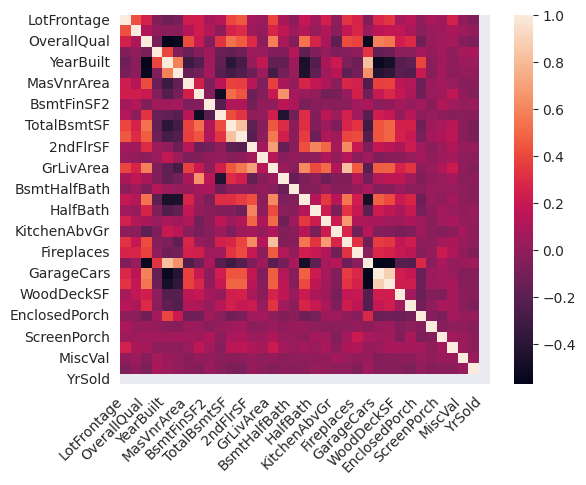

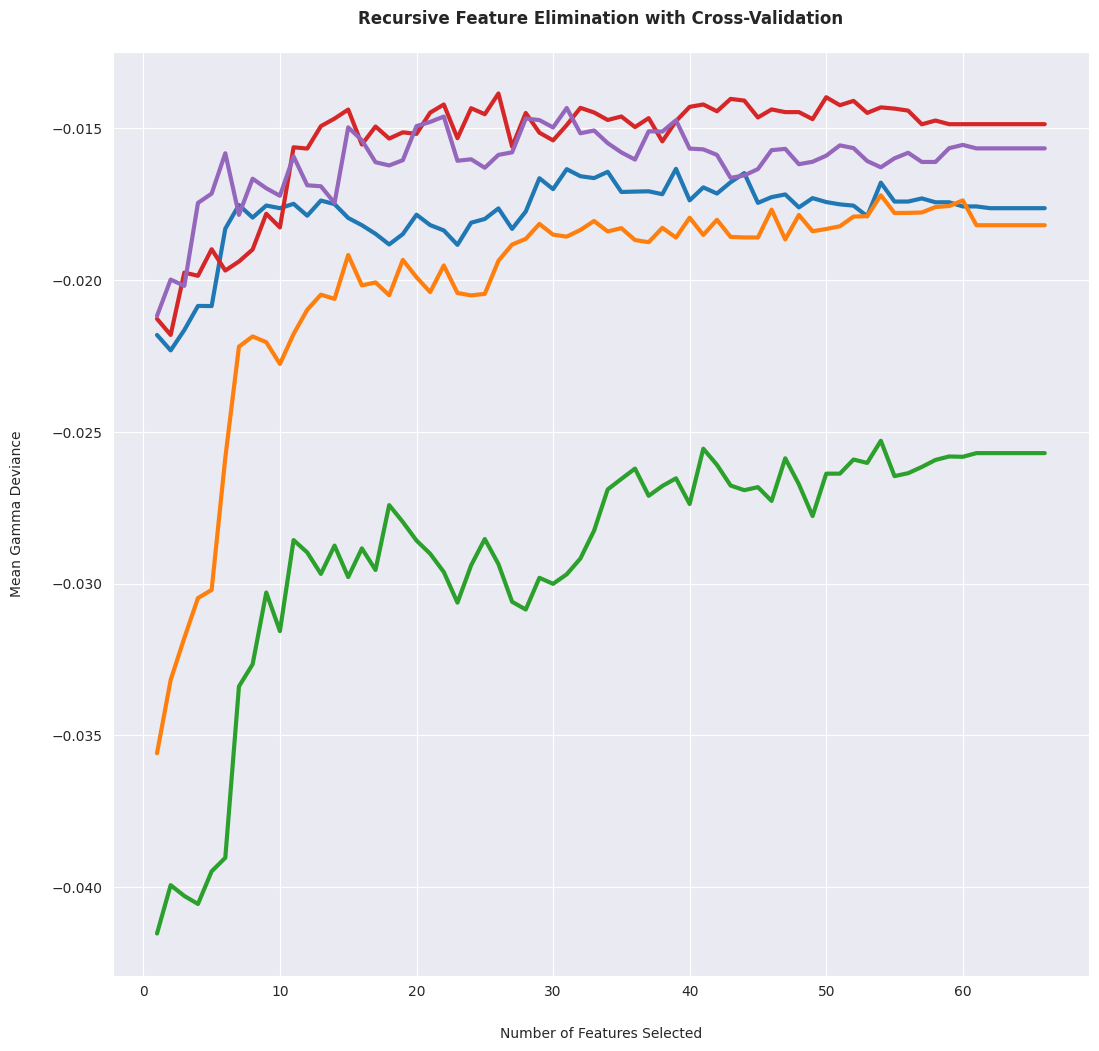

src.data_preprocessing.rfe-INFO-FEATURES SELECTED ARE Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Alley', 'LotShape',
       'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'CentralAir', 'Electrical', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'Functional',
       'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars',
       'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'ScreenPorch', 'PoolArea', 'Fence', 'MiscVal',
       'MoSold', 'SaleType', '

2022-12-07 06:53:27,126 | INFO : FEATURES SELECTED ARE Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Alley', 'LotShape',
       'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'CentralAir', 'Electrical', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'Functional',
       'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars',
       'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'ScreenPorch', 'PoolArea', 'Fence', 'MiscVal',
       'MoSold', 'SaleType', 

src.data_preprocessing.rfe-INFO-TOTAL NUMBER OF FEATURES: 75


2022-12-07 06:53:27,129 | INFO : TOTAL NUMBER OF FEATURES: 75


src.data_preprocessing.rfe-INFO-NUMBER OF FEATURES SELECTED DURING FITTING: 63


2022-12-07 06:53:27,130 | INFO : NUMBER OF FEATURES SELECTED DURING FITTING: 63


src.data_preprocessing.rfe-INFO-CREATING NEW DATAFRAME WITH SELECTED FEATURES...


2022-12-07 06:53:27,131 | INFO : CREATING NEW DATAFRAME WITH SELECTED FEATURES...


In [14]:
X_train_eng = pipe.fit_transform(X_train_eng, y_train)

In [15]:
X_valid_eng = pipe.transform(X_valid_eng)

src.data_preprocessing.feat_eng-INFO-HANDLING RARE CATEGORICAL LABELS...


2022-12-07 06:56:32,780 | INFO : HANDLING RARE CATEGORICAL LABELS...


src.data_preprocessing.feat_eng-INFO-ENCODING CATEGORICAL VARIABLES...


2022-12-07 06:56:32,802 | INFO : ENCODING CATEGORICAL VARIABLES...


__main__-INFO-REMOVING CORRELATED FEATURES...


2022-12-07 06:56:32,842 | INFO : REMOVING CORRELATED FEATURES...


src.data_preprocessing.rfe-INFO-TOTAL NUMBER OF FEATURES: 75


2022-12-07 06:56:32,845 | INFO : TOTAL NUMBER OF FEATURES: 75


src.data_preprocessing.rfe-INFO-NUMBER OF FEATURES SELECTED DURING FITTING: 63


2022-12-07 06:56:32,847 | INFO : NUMBER OF FEATURES SELECTED DURING FITTING: 63


src.data_preprocessing.rfe-INFO-CREATING NEW DATAFRAME WITH SELECTED FEATURES...


2022-12-07 06:56:32,848 | INFO : CREATING NEW DATAFRAME WITH SELECTED FEATURES...


In [16]:
X_test_eng = pipe.transform(X_test_eng)

src.data_preprocessing.feat_eng-INFO-HANDLING RARE CATEGORICAL LABELS...


2022-12-07 06:56:38,835 | INFO : HANDLING RARE CATEGORICAL LABELS...


src.data_preprocessing.feat_eng-INFO-ENCODING CATEGORICAL VARIABLES...


2022-12-07 06:56:38,875 | INFO : ENCODING CATEGORICAL VARIABLES...


__main__-INFO-REMOVING CORRELATED FEATURES...


2022-12-07 06:56:38,930 | INFO : REMOVING CORRELATED FEATURES...


src.data_preprocessing.rfe-INFO-TOTAL NUMBER OF FEATURES: 75


2022-12-07 06:56:38,934 | INFO : TOTAL NUMBER OF FEATURES: 75


src.data_preprocessing.rfe-INFO-NUMBER OF FEATURES SELECTED DURING FITTING: 63


2022-12-07 06:56:38,935 | INFO : NUMBER OF FEATURES SELECTED DURING FITTING: 63


src.data_preprocessing.rfe-INFO-CREATING NEW DATAFRAME WITH SELECTED FEATURES...


2022-12-07 06:56:38,936 | INFO : CREATING NEW DATAFRAME WITH SELECTED FEATURES...


## Save Point for the Feature Engineered Datasets

In [52]:
save_feat_eng_df('../Results/feature_engineered/train_feat_eng.pkl', X_train_eng, target=y_train)
save_feat_eng_df('../Results/feature_engineered/valid_feat_eng.pkl', X_valid_eng, target=y_valid)
save_feat_eng_df('../Results/feature_engineered/test_feat_eng.pkl', X_test_eng)

__main__-INFO-CONCATENATING THE FEATURE ENGINEERED DATAFRAME AND THE TARGET COLUMN...


2022-12-07 07:41:09,701 | INFO : CONCATENATING THE FEATURE ENGINEERED DATAFRAME AND THE TARGET COLUMN...


__main__-INFO-SAVING THE DATAFRAME WITH SHAPE: (1168, 64)


2022-12-07 07:41:09,707 | INFO : SAVING THE DATAFRAME WITH SHAPE: (1168, 64)


__main__-INFO-CONCATENATING THE FEATURE ENGINEERED DATAFRAME AND THE TARGET COLUMN...


2022-12-07 07:41:09,711 | INFO : CONCATENATING THE FEATURE ENGINEERED DATAFRAME AND THE TARGET COLUMN...


__main__-INFO-SAVING THE DATAFRAME WITH SHAPE: (292, 64)


2022-12-07 07:41:09,716 | INFO : SAVING THE DATAFRAME WITH SHAPE: (292, 64)


__main__-INFO-SAVING THE DATAFRAME WITH SHAPE: (1459, 63)


2022-12-07 07:41:09,720 | INFO : SAVING THE DATAFRAME WITH SHAPE: (1459, 63)
